# Projeto 2 - Ciência dos Dados

______________________________________________________

## Participantes:


Henrique Andrade Albuqurque 


Mateus Marinheiro 


Matheus Constante

________________________________________

## Introdução

### Tema:

   Previsão da nota média do Enem de um aluno baseado nos seguintes features:

### Target:
 
 - NU_NOTA_REDACAO:
   - Nota final da Redação de 2022 por participante
   


### Features: 

 - TP_FAIXA_ETARIA:
   - Faixa Etária dos participantes
      - 1- Menor de 17 anos
      - 2- 17 anos
      - 3- 18 anos
      - 4- 19 anos
      - 5- 20 anos
      - 6- 21 anos
      - 7- 22 anos
      - 8- 23 anos
      - 9- 24 anos
      - 10- 25 anos
      - 11- Entre 26 e 30 anos
      - 12- Entre 31 e 35 anos
      - 13- Entre 36 e 40 anos
      - 14- Entre 41 e 45 anos
      - 15- Entre 46 e 50 anos
      - 16- Entre 51 e 55 anos
      - 17- Entre 56 e 60 anos
      - 18- Entre 61 e 65 anos
      - 19- Entre 66 e 70 anos
      - 20- Maior de 70 anos

 - TP_SEXO: 
    - Sexo do Participante
      - M - Masculino
      - F - Feminino
 - TP_COR_RAÇA:
    - Cor/Raça do participante
      - 0- Não declarado
      - 1- Branca
      - 2- Preta
      - 3- Parda
      - 4- Amarela
      - 5- Indígina
      - 6- Não dispõe da informação
 - NU_NOTA_CN:
    - Nota do participante em Ciências da Natureza
 - TP_ESCOLA:
    - Tipo de escola do Ensino Médio:
       - 1- Não respondeu
       - 2- Pública
       - 3- Privada

________

Carregando algumas bibliotecas:

In [142]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [143]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\Mateus Marinhero\Documents\Insper\2023\2o Semestre\Ciência dos Dados\Projeto2\Projeto-2-Ciencia-dos-Dados


Carregando a base de dados:

In [144]:
dados = pd.read_excel('DADOS\MICRODADOS_ENEM_2022.xlsx')
dados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,14,M,2,2,1,NaN,NaN,NaN,NaN,NaN
1,14,M,1,16,1,NaN,NaN,NaN,NaN,NaN
2,5,F,2,2,1,421.1,546.0,498.8,565.3,760.0
3,6,M,3,2,1,490.7,388.6,357.8,416.0,320.0
4,4,M,3,1,1,NaN,NaN,NaN,NaN,NaN


Separando colunas de Target e Features:

In [145]:
dados = dados.loc[:, ["TP_FAIXA_ETARIA", "TP_SEXO", "TP_COR_RACA", "TP_ESCOLA", "NU_NOTA_CN", "NU_NOTA_MT"]]
dados.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_MT
0,14,M,2,1,NaN,NaN
1,14,M,1,1,NaN,NaN
2,5,F,2,1,421.1,565.3
3,6,M,3,1,490.7,416.0
4,4,M,3,1,NaN,NaN


In [146]:
n = len(dados)
print('Quantidade de linhas antes da limpeza: ', n)

Quantidade de linhas antes da limpeza:  1048575


Limpando linhas com valores nulos:

In [147]:
dados = dados.dropna()
n = len(dados)
print('Quantidade de linhas após a limpeza: ', n)


Quantidade de linhas após a limpeza:  742806


#### Análise descritiva detalhada das variáveis


- Faixa Etária x Notas de Matemática

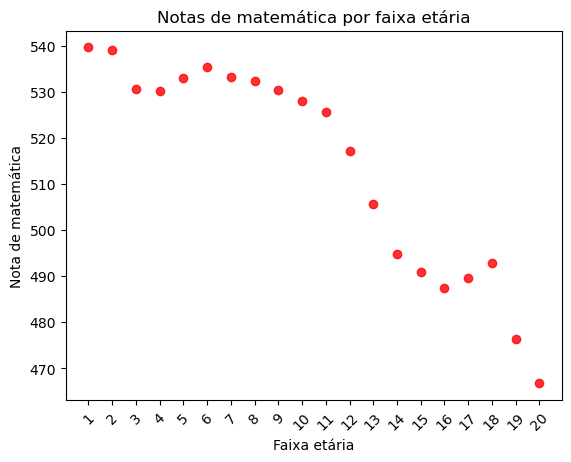

In [148]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que 'dados' seja o DataFrame que contém suas notas e faixas etárias

# Médias das notas de matemática por faixa etária
y = dados.groupby(['TP_FAIXA_ETARIA']).NU_NOTA_MT.mean()

# Criando um array com os índices para o eixo x
x = np.arange(len(y))

# Gráfico de dispersão das notas de matemática por faixa etária
plt.scatter(x, y, c='red', alpha=0.8)

# Configurando os ticks do eixo x
plt.xticks(x, labels=y.index, rotation=45)

plt.title('Notas de matemática por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Nota de matemática')
plt.show()


- Sexo x Nota de Matemática

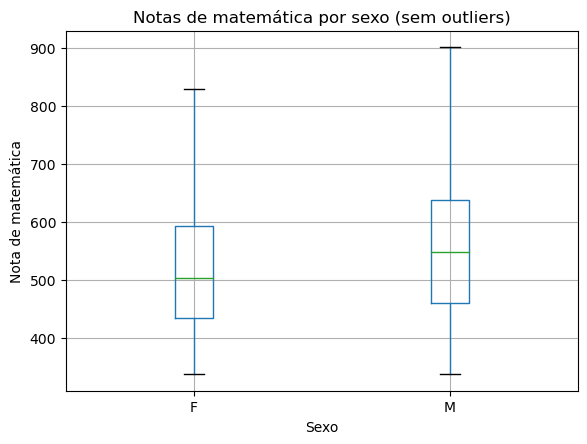

In [149]:
# Boxplot das notas de matemática por sexo sem outliers
dados.boxplot(column='NU_NOTA_MT', by='TP_SEXO', sym='')
plt.title('Notas de matemática por sexo (sem outliers)')
plt.suptitle('')
plt.xlabel('Sexo')
plt.ylabel('Nota de matemática')
plt.show()



- Cor/Raça x Notas de Matemática

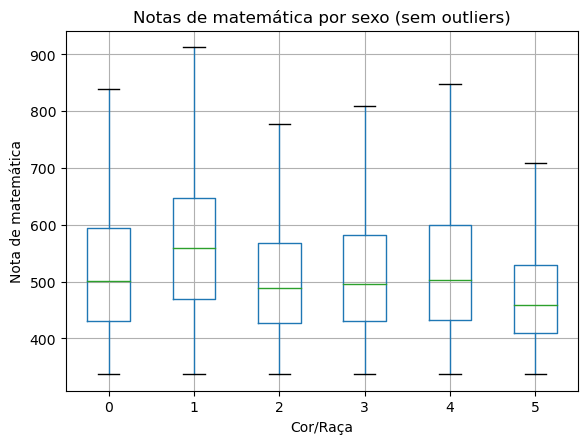

In [152]:
# Boxplot das notas de matemática por sexo sem outliers
dados.boxplot(column='NU_NOTA_MT', by='TP_COR_RACA', sym='')
plt.title('Notas de matemática por sexo (sem outliers)')
plt.suptitle('')
plt.xlabel('Cor/Raça')
plt.ylabel('Nota de matemática')
plt.show()



 - Tipo de Escola x Nota de Matemática

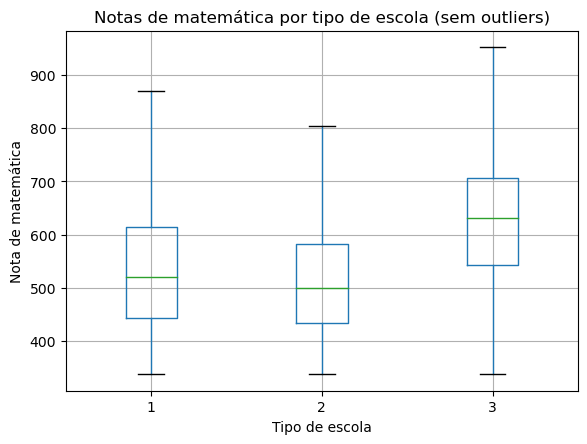

In [151]:
# box plot das notas de matemática por tipo de escola
dados.boxplot(column='NU_NOTA_MT', by='TP_ESCOLA', sym='')
plt.title('Notas de matemática por tipo de escola (sem outliers)')
plt.suptitle('')
plt.xlabel('Tipo de escola')
plt.ylabel('Nota de matemática')
plt.show()


 - Nota de Ciências da Natureza x Nota de Matemática

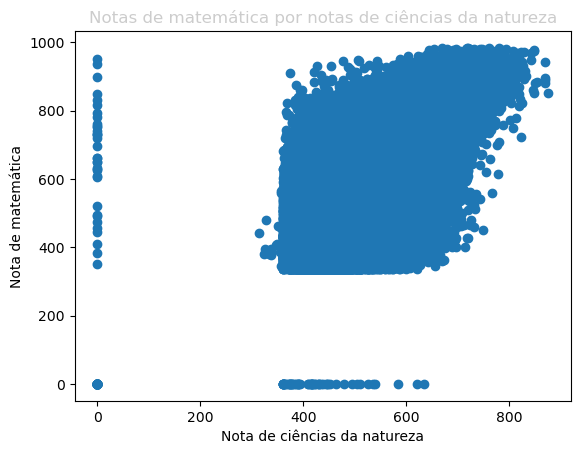

Correlação entre as notas de matemática e ciências da natureza:  0.6051116637093489


In [157]:
# grafico de dispersão das notas de matemática por notas de ciencias da natureza
plt.scatter(dados['NU_NOTA_CN'], dados['NU_NOTA_MT'])
plt.title('Notas de matemática por notas de ciências da natureza', alpha=0.2)
plt.xlabel('Nota de ciências da natureza')
plt.ylabel('Nota de matemática')
plt.show()

corr = dados[['NU_NOTA_CN', 'NU_NOTA_MT']].corr()
print('Correlação entre as notas de matemática e ciências da natureza: ', corr.iloc[0,1])

## Referências:

 - https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados